# Biblioteki

In [255]:
from PIL import Image
import numpy as np
import math
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Test kompresji PCA na obrazku 450x450 typu 'jpg'

Na potrzeby pracy domowej weźmy zdjęcie znanego piłkarza Roberta Lewandowskiego

In [224]:
# funkcja do testów
def PCAtest(im_arr, components):
    im_arr = np.reshape(im_arr, (450, 450 * 3))
    pca = PCA(components)
    im_pca = pca.fit_transform(im_arr)
    tr = pca.inverse_transform(im_pca)
    tr = np.reshape(tr, (450,450,3))
    tr = tr.astype('uint8')
    return tr

In [225]:
image = Image.open('Lewandowski1.jpg')
im_arr = np.asarray(image)

In [235]:
tr_10 = PCAtest(im_arr, 10)
tr_25 = PCAtest(im_arr, 25)
tr_50 = PCAtest(im_arr, 50)
tr_100 = PCAtest(im_arr, 100)
tr_200 = PCAtest(im_arr, 200)
tr_450 = PCAtest(im_arr, 450)
level_1 = np.hstack((tr_10, tr_25))
level_2 = np.hstack((tr_50, tr_100))
level_3 = np.hstack((tr_200, tr_450))

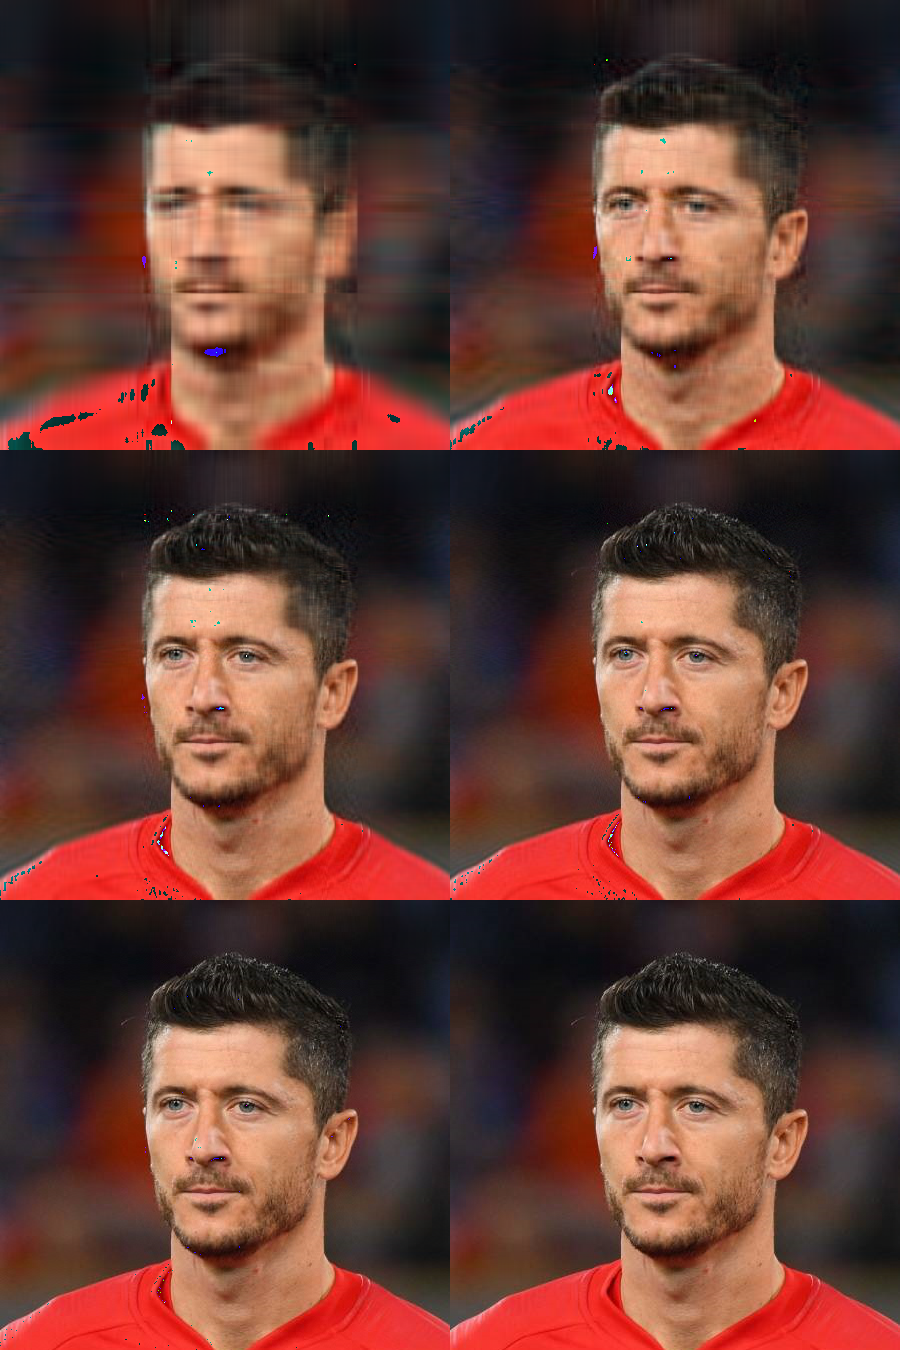

In [236]:
Image.fromarray(np.vstack((level_1, level_2, level_3)))

Niestety można zaobserwować straty na pojedynczych pikselach. Pomijając te 'wypryski', dla 100 komponentów jakość jest nieco gorsza ale jeszcze nie przeszkadzająca w odbiorze obrazka.

Sprawdźmy teraz jaki wpływ ma kompresja na rozmiar macierzy opisującej zdjęcie.

In [239]:
im_arr.nbytes
# liczba bitów oryginału

607500

In [261]:
ratios = []
org_size = im_arr.nbytes
checked_comp_num = np.linspace(10, 450, 45).astype(int)
im_arr = np.reshape(im_arr, (450, 450 * 3))
for c in checked_comp_num:
    pca = PCA(c)
    im_pca = pca.fit_transform(im_arr)
    ratios.append(org_size/im_pca.nbytes)

Text(0.5, 0, 'components number')

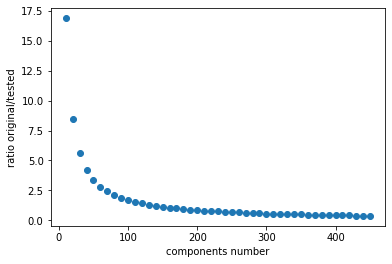

In [262]:
plt.scatter(checked_comp_num, ratios)
plt.ylabel("ratio original/tested")
plt.xlabel("components number")

Widać, że dla naszych 100 komponentów obrazek jest jedynie około 2 razy mniejszy.

# Dodatek - usuwanie szumu

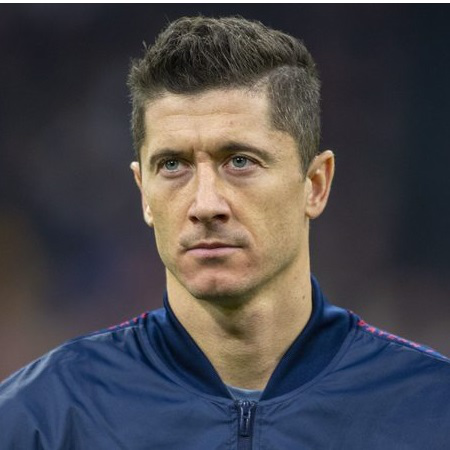

In [270]:
image = Image.open('Lewandowski2.jpg')
im_arr = np.asarray(image)
image

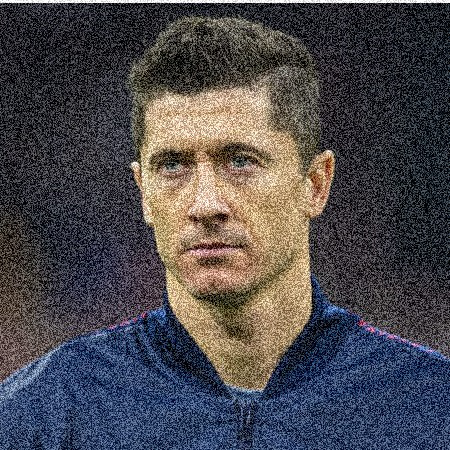

In [271]:
image = Image.open('Lewandowski2_szum.jpg')
im_arr_noise = np.asarray(image)
image

Jak widać drugi obrazek jest okraszony olbrzymią ilością szumu. Spróbujemy za pomocą kompresji PCA sprowadzić oba obrazki(ten z szumem jak i bez) do podobnej postaci.

In [282]:
def getboth(im_arr, im_arr_noise, n_pca):
    normal = PCAtest(im_arr, n_pca)
    noise = PCAtest(im_arr_noise, n_pca)
    return np.hstack((normal, noise))

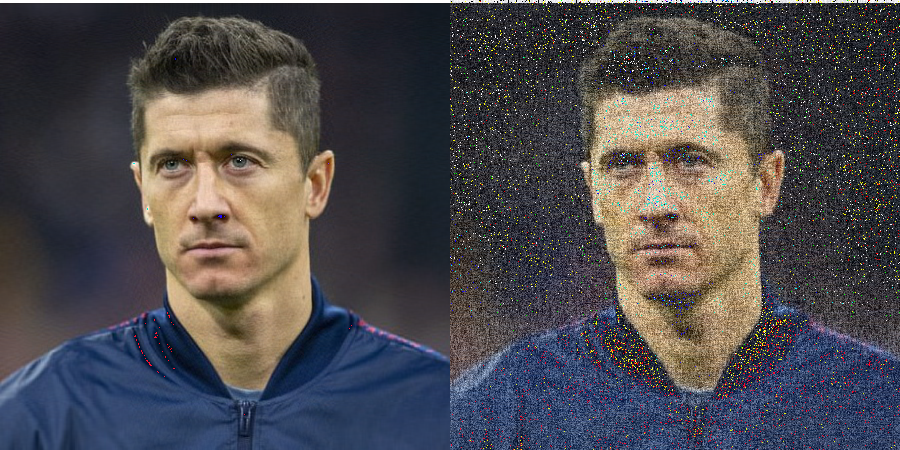

In [283]:
n_pca = 100
Image.fromarray(getboth(im_arr, im_arr_noise, n_pca))

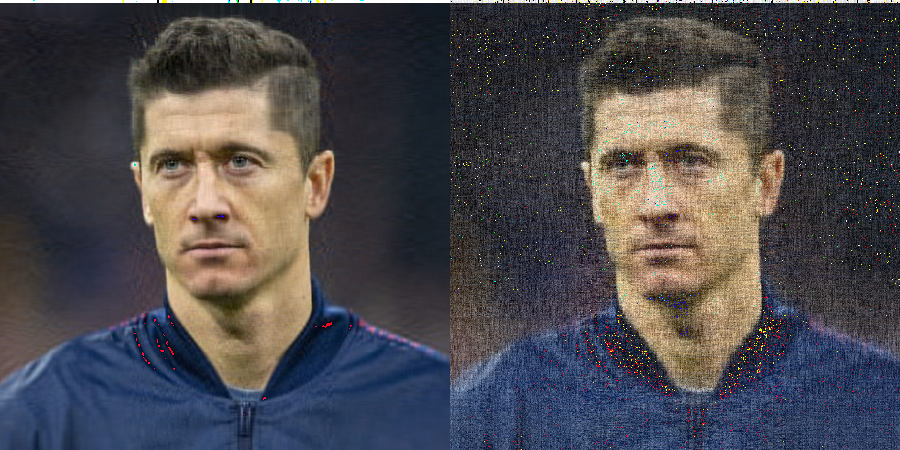

In [285]:
n_pca = 50
Image.fromarray(getboth(im_arr, im_arr_noise, n_pca))

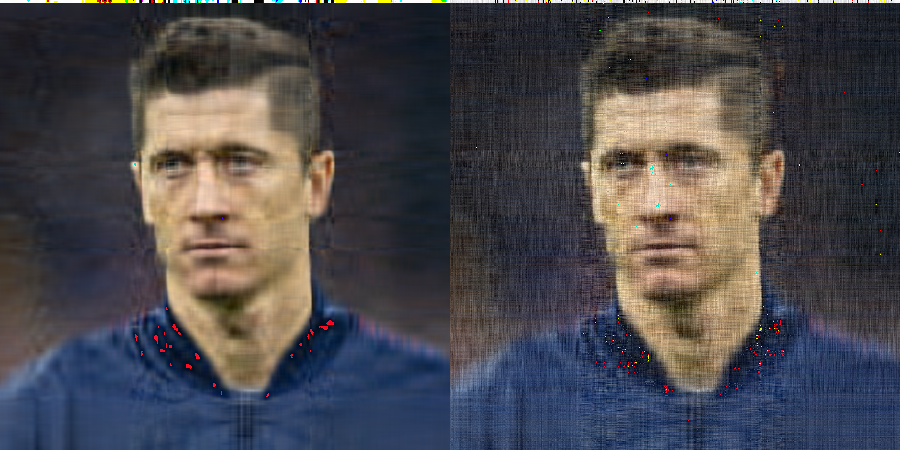

In [288]:
n_pca = 20
Image.fromarray(getboth(im_arr, im_arr_noise, n_pca))

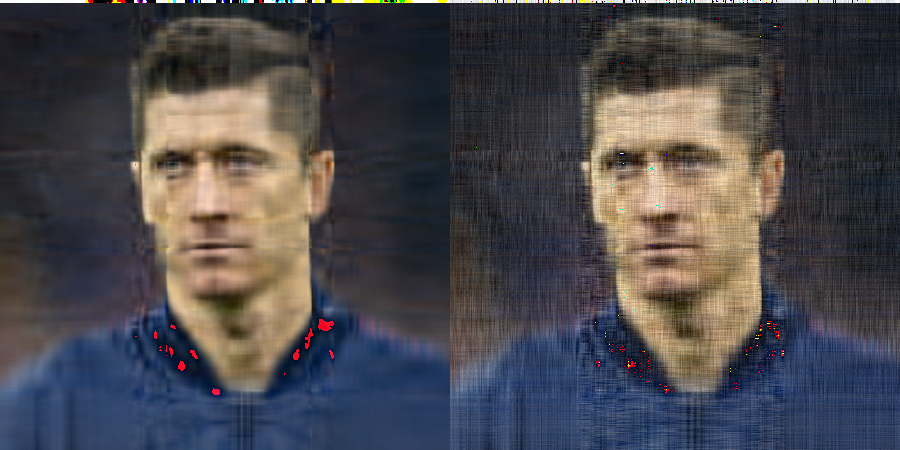

In [290]:
n_pca = 15
Image.fromarray(getboth(im_arr, im_arr_noise, n_pca))

Widać, że dla 20 zachowuje się to już całkiem nieźle.  
Skąd w ogóle pomysł, żeby to robić?  
Szczerze mówiąc osobiście nie wiem jak to się odbywa w świecie rzeczywistym, ale tak na logikę. Chcemy rozpoznawać twarz konkretnej osoby z nagrań z kamer ulicznych. Kamery uliczne mogą nagrywać w różnej jakości, mogą być trochę uszkodzone, zakłócane (taki szum, a raczej lżejszy może powstawać). W uczeniu modelu czyichś rysów twarzy tak ostre zdjęcie, jak pokazany wyżej oryginał, mogłoby okazać się trochę zbyt dokładne. Kiedy sprowadzimy zdjęcia do nieco gorszej jakości, tym samym redukując szum drugiego, upodabniamy je do siebie.  
W ten sposób uzyskujemy zdjęcie służące do uczenia modelu, zbliżone charakterystyką do zdjęcia które otrzymamy z nagrania.